In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
dataset=pd.read_csv('borrow.csv')
dataset

,Home_owner,Martial_status,Annual_income,Defaulted
0,yes,single,125000,no
1,no,married,100000,no
2,no,single,70000,no
3,yes,married,120000,no
4,no,divorced,95000,yes
5,no,single,60000,no
6,yes,divorced,220000,no
7,no,single,85000,yes
8,no,married,75000,no
9,no,single,90000,yes


In [6]:
dataset.shape

(10, 4)

In [8]:
dataset.describe()

,Annual_income
count,10.000000
mean,104000.000000
std,45631.373223
min,60000.000000
25%,77500.000000
50%,92500.000000
75%,115000.000000
max,220000.000000


In [10]:
dataset['Defaulted'].value_counts()

no     7
yes    3
Name: Defaulted, dtype: int64

In [12]:
a=dataset['Home_owner']
b=dataset['Martial_status']
c=dataset['Defaulted']

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Home_owner']=le.fit_transform(a)
dataset['Martial_status']=le.fit_transform(b)
dataset['Defaulted']=le.fit_transform(c)

In [17]:
dataset

,Home_owner,Martial_status,Annual_income,Defaulted
0,1,2,125000,0
1,0,1,100000,0
2,0,2,70000,0
3,1,1,120000,0
4,0,0,95000,1
5,0,2,60000,0
6,1,0,220000,0
7,0,2,85000,1
8,0,1,75000,0
9,0,2,90000,1


In [19]:
x=dataset.drop('Defaulted',axis=1)
x

,Home_owner,Martial_status,Annual_income
0,1,2,125000
1,0,1,100000
2,0,2,70000
3,1,1,120000
4,0,0,95000
5,0,2,60000
6,1,0,220000
7,0,2,85000
8,0,1,75000
9,0,2,90000


In [21]:
y=dataset['Defaulted']
y

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Defaulted, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)


In [28]:
x_train
x_train.shape

(7, 3)

In [30]:
x_test
x_test.shape

(3, 3)

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1])

In [38]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_pred,y_test)*100)

Accuracy: 33.33333333333333


In [42]:
from sklearn.metrics import classification_report


In [41]:
classification_report(y_pred,y_test)

C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       1.00      0.33      0.50         3\n\n    accuracy                           0.33         3\n   macro avg       0.50      0.17      0.25         3\nweighted avg       1.00      0.33      0.50         3\n'

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
print("Confusion Matrix: ",confusion_matrix(y_pred,y_test))

Confusion Matrix:  [[0 0]
 [2 1]]


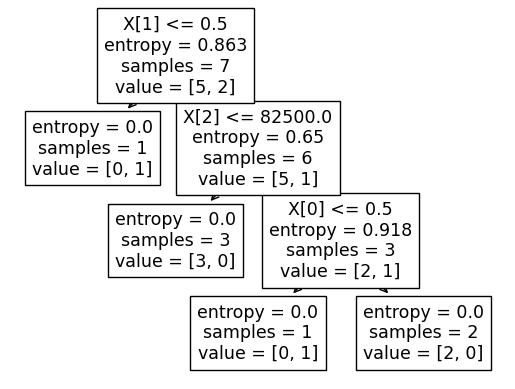

In [47]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [48]:
x=[[1,1,0]]
y_pred=clf.predict(x)
y_pred

C:\Users\ML Lab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])